In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
print(dataset.head())
#selecting only 2 columns to visualise clustering in 2D graph in this scenario. We can choose any no of columns
X=dataset.iloc[:,3:5].values
print(X)

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [

# Using Elbow method to find optimal number of clusters

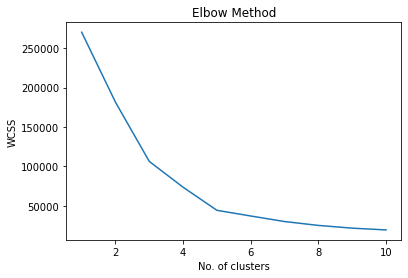

In [3]:
from sklearn.cluster import KMeans
# WCSS - Within-Cluster-Sum-of-Squares
wcss=[]
for i in range(1,11): # run from 1 to 10. Upper bound(11) isn't included
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    # inertia_ will calculate the distance of each data point to the centroid of clusters('i' in this case)
    wcss.append(kmeans.inertia_) 

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

# Training K-mean model on dataset

In [4]:
# No. of cluster=5 which is determined by above Elbow Chart. From 5, WCSS curve isn't deviating much(constant)
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [5]:
print(y_kmeans) # Returns index of clusters

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


# Visualising Cluster

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


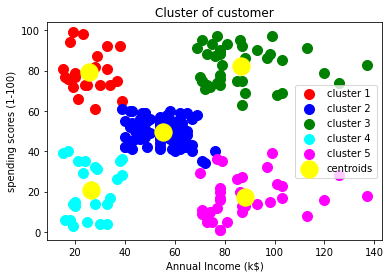

In [9]:
# We are selecting only Annual Income(X axis) & Spending Score(Y axis)]
# Selecting row that matches cluster 0. X[y_kmeans==0,0]-X[selected_row, column(axis)]
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1], s=100, c='red', label="cluster 1")# select customer with value 0
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1], s=100, c='blue', label="cluster 2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1], s=100, c='green', label="cluster 3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1], s=100, c='cyan', label="cluster 4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1], s=100, c='magenta', label="cluster 5")

print(kmeans.cluster_centers_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label="centroids")
plt.title("Cluster of customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("spending scores (1-100)")
plt.legend()
plt.show()

In [11]:
k = X[y_kmeans==0,:]
print(type(k))
print(k)

<class 'numpy.ndarray'>
[[15 81]
 [16 77]
 [17 76]
 [18 94]
 [19 72]
 [19 99]
 [20 77]
 [20 79]
 [21 66]
 [23 98]
 [24 73]
 [25 73]
 [28 82]
 [28 61]
 [29 87]
 [30 73]
 [33 92]
 [33 81]
 [34 73]
 [37 75]
 [38 92]
 [39 65]]
